## Data management with fiftyone

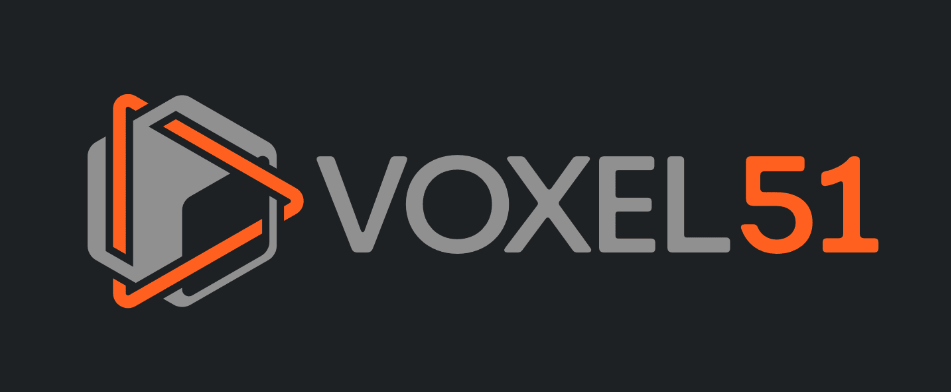

https://voxel51.com/

 * FiftyOne Dataset Zoo
   * Loading public datasets from fiftyone zoo
   
 * Building a dataset from local files
   * Classification dataset
   * Object detetction dataset
   * Instance segmentation dataset

In [ ]:
! pip install fiftyone

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

import fiftyone as fo
import fiftyone.zoo as foz

%matplotlib inline

### Loading datasets form fiftyone zoo

In [ ]:
fo.pprint(foz.list_zoo_datasets())

In [ ]:
# load cifar10

ds = foz.load_zoo_dataset(
    name="cifar10",
    splits=["train", "test"],
    persistent=False,
    max_samples=50
)

fo.pprint(ds.stats())

### Exploring samples from a dataset

In [8]:
# first and last samples
first_sample = ds.first()
last_sample = ds.last()

first_sample

<Sample: {
    'id': '667a26a7aa1b7c07d5714361',
    'media_type': 'image',
    'filepath': '/Users/mlstudio/fiftyone/cifar10/train/data/000001.jpg',
    'tags': ['train'],
    'metadata': None,
    'ground_truth': <Classification: {
        'id': '667a26a7aa1b7c07d5714360',
        'tags': [],
        'label': 'frog',
        'confidence': None,
        'logits': None,
    }>,
}>

In [11]:
# get the filepath

first_sample["filepath"]

'/Users/mlstudio/fiftyone/cifar10/train/data/000001.jpg'

In [13]:
# get the first 10 samples (pandas-like)
type(ds.head())

list

### Taking a sliced view of the dataset

In [14]:
view = ds.take(20) # -> a view

view

Dataset:     cifar10-train-test-50
Media type:  image
Num samples: 20
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
View stages:
    1. Take(size=20, seed=None)

### Reading and visualizing the data in Matplotlib

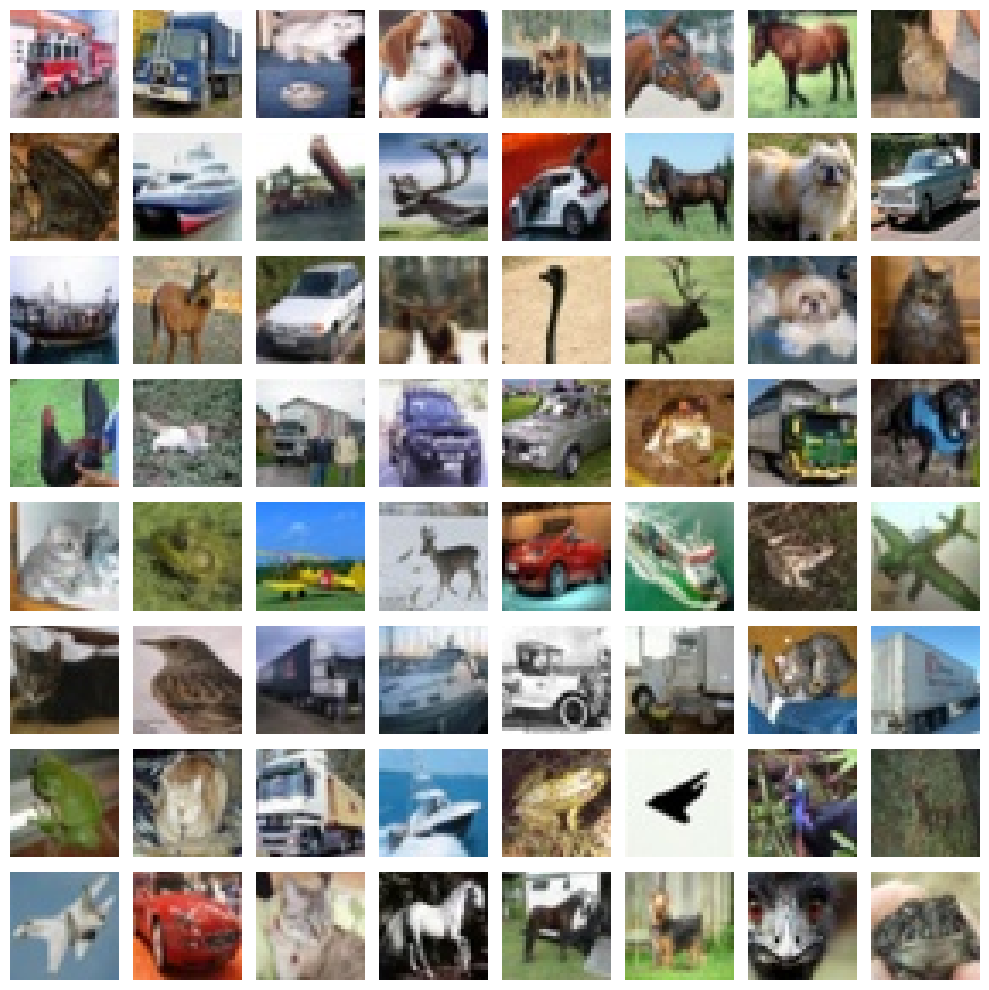

In [15]:
fig, axes = plt.subplots(8, 8, figsize=(10, 10))

for i, sample in enumerate(ds.take(64)):
    row, col = i // 8, i % 8
    img = Image.open(sample["filepath"])
    axes[row, col].imshow(img)

[axes[i, j].axis('off') for i in range(8) for j in range(8)]

plt.tight_layout()
plt.show()

### Visualize the data with fiftyone app

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



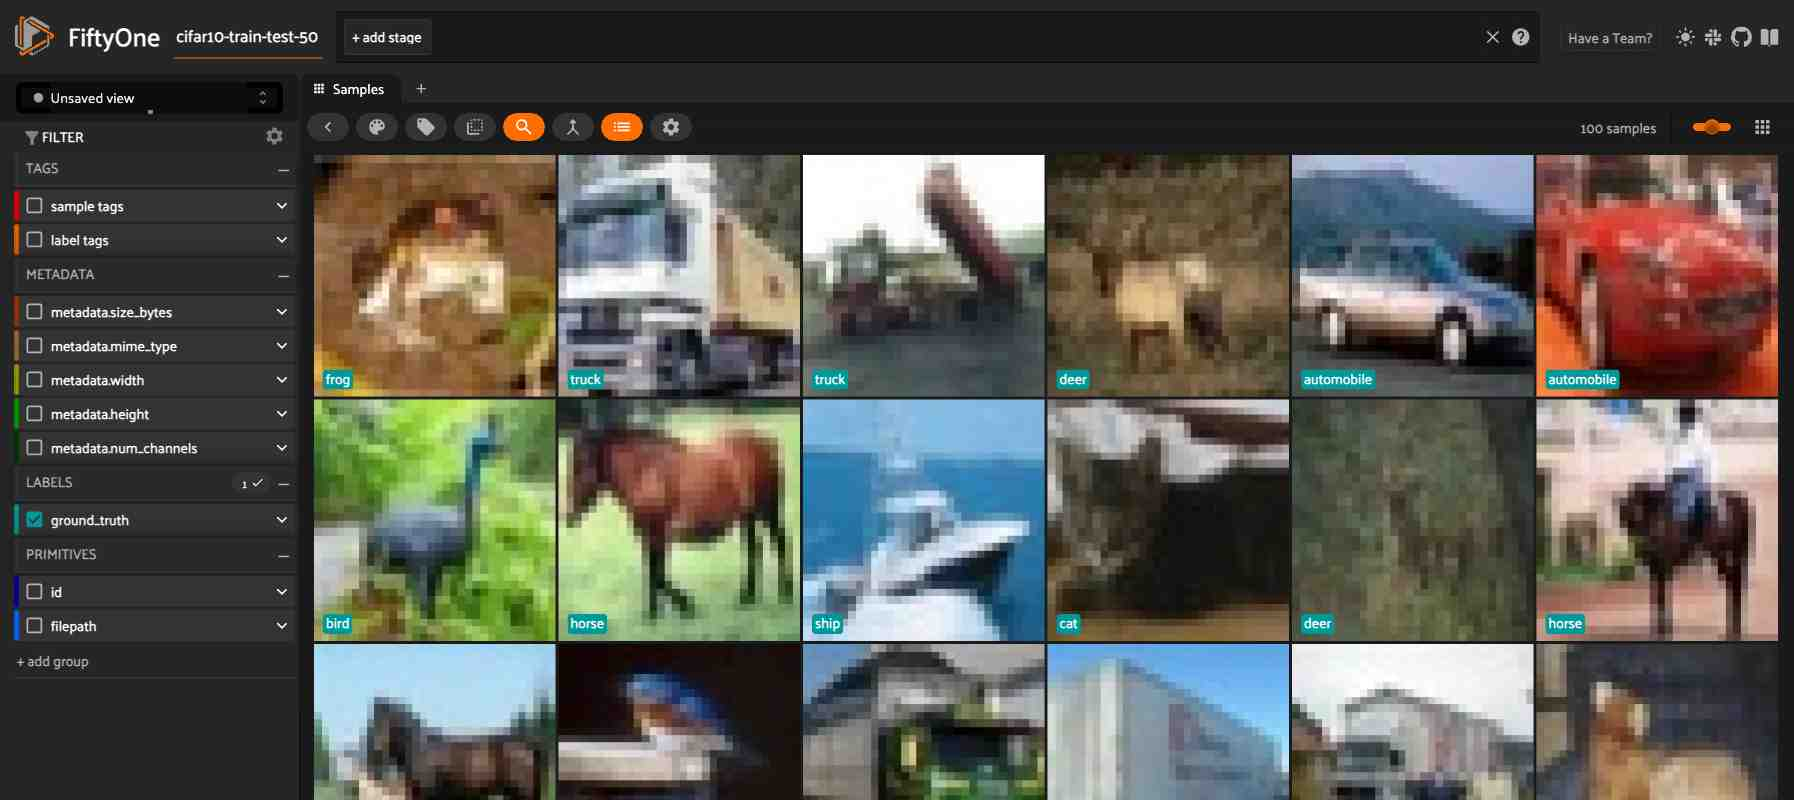

In [16]:
# run the app
session = fo.launch_app(ds)

# uncomment next line if running as a script:
#session.wait()


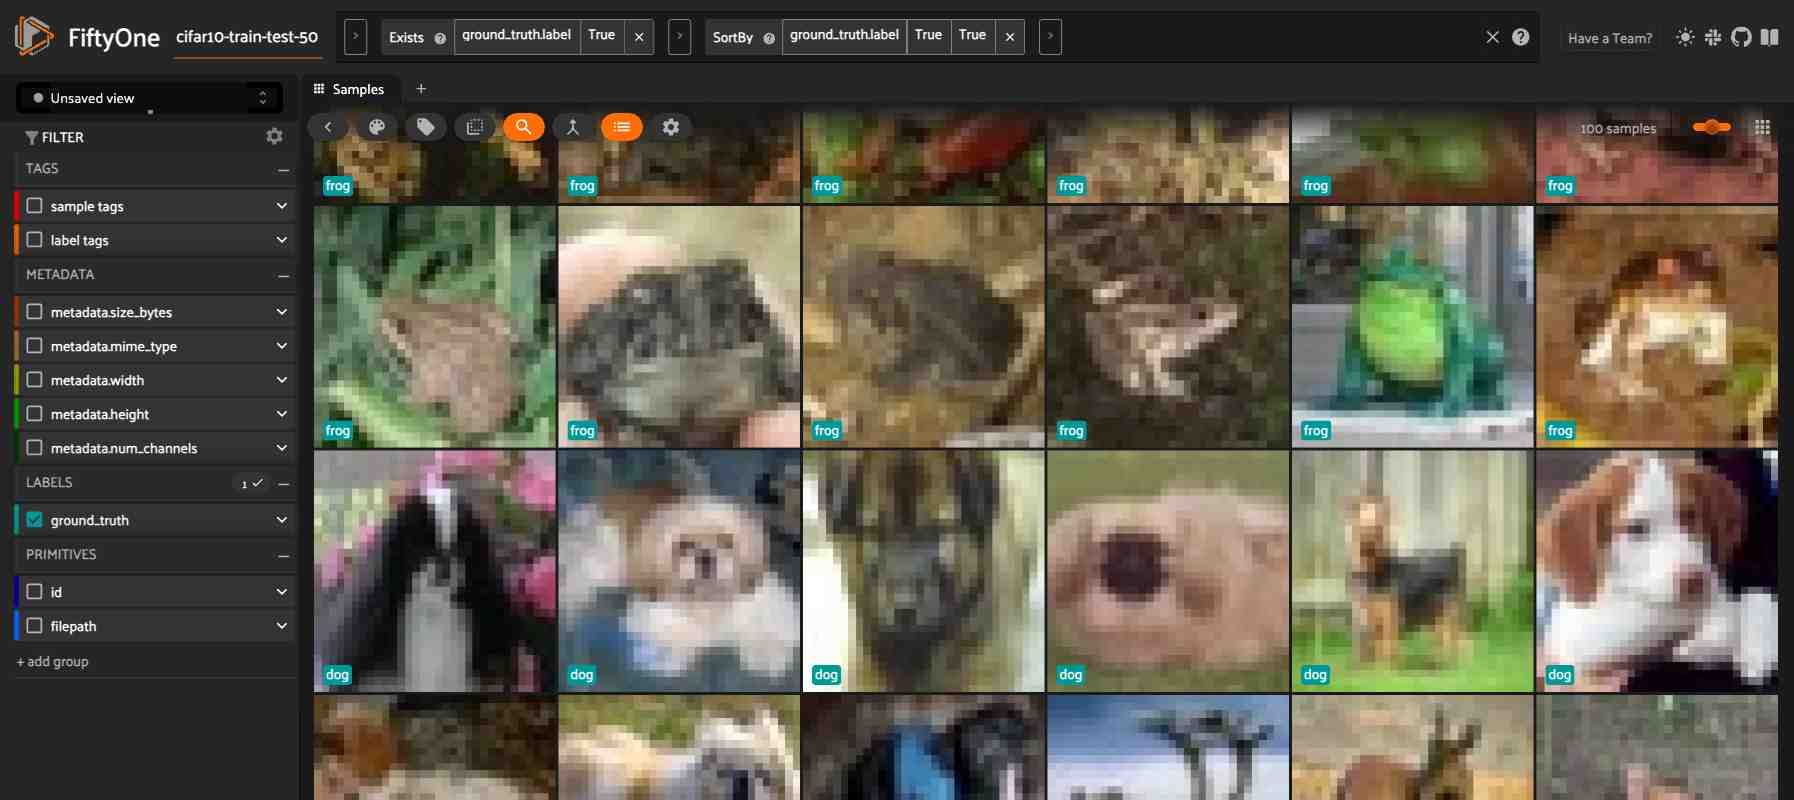

In [17]:
# sorting the labels

view = ds.exists("ground_truth.label").sort_by("ground_truth.label", reverse=True)

session.view = view

### Loading existing datasets

In [18]:
# list existing datasets
fo.list_datasets()

['cifar10-train-test-50']

In [19]:
ds = fo.load_dataset('cifar10-train-test-50')

ds.stats()

{'samples_count': 100,
 'samples_bytes': 26593,
 'samples_size': '26.0KB',
 'total_bytes': 26593,
 'total_size': '26.0KB'}

### Deleting a dataset

In [20]:
ds.delete()

In [21]:
# check the list of datasets

fo.list_datasets()

[]

## Creating a dataset from local images

```
data/
├── annotations
│   ├── pic01.json
│   ├── pic02.json
│   ├── pic03.json
│   ├── pic04.json
│   ├── ...
│
└── images
    ├── pic01.jpg
    ├── pic02.jpg
    ├── pic03.jpg
    ├── pic04.jpg
    ├── ...
```

In [22]:
# create a new dataset
ds = fo.Dataset("my-classification-dataset")

ds

Name:        my-classification-dataset
Media type:  None
Num samples: 0
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)

In [23]:
# after creation, use load_dataset()
ds = fo.load_dataset("my-classification-dataset")
ds

Name:        my-classification-dataset
Media type:  None
Num samples: 0
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)

#### Creating a new sample

In [24]:
image_path = "data/images/pic01.jpg"

sample = fo.Sample(filepath=image_path)
sample

<Sample: {
    'id': None,
    'media_type': 'image',
    'filepath': '/Users/mlstudio/git/mlstudio/Notebooks/fiftyone-dataset-management/data/images/pic01.jpg',
    'tags': [],
    'metadata': None,
}>

In [25]:
sample["tags"].append("train")

sample

<Sample: {
    'id': None,
    'media_type': 'image',
    'filepath': '/Users/mlstudio/git/mlstudio/Notebooks/fiftyone-dataset-management/data/images/pic01.jpg',
    'tags': ['train'],
    'metadata': None,
}>

#### Adding labels to the sample

In [26]:
import json

annot_file = "data/annotations/pic01.json"
with open(annot_file, "rt") as f:
    annot = json.load(f)

annot

{'filename': 'pic01.jpg',
 'width': 1024,
 'height': 1024,
 'results': [{'label': 'bird',
   'polygon': 'POLYGON ((0.6021246709747531 0.2616609757421573, 0.6336413209666665 0.2293362065196821, 0.6894015478754362 0.1808490526859693, 0.7734459478538718 0.1210482296243901, 0.832438651684889 0.1210482296243901, 0.8081950747680325 0.1832734103776549, 0.8938557132075919 0.1444836873106846, 0.9496159401163617 0.1315537796216946, 0.9665089899497047 0.1325711063239389, 0.9693934825436223 0.1405835857514881, 0.9514455286259123 0.1582110404920963, 0.9572145138137477 0.1639800256799317, 0.9488815352090965 0.1790434870037242, 0.9315745796455902 0.190901956556497, 0.9360615681250178 0.1963504425672304, 0.9267670919890607 0.2082089121200033, 0.9088191380713505 0.2197468824956741, 0.9088191380713505 0.2290413586316312, 0.8918326816849462 0.2389768331217921, 0.8972811676956796 0.2421818248928118, 0.8908711841536403 0.2511558018516669, 0.8774102187153576 0.260770777164726, 0.8652312499854828 0.265578264

#### Different types of labels / predictions

 * Classification (multi-class, multi-label)
 * Detection
 * Polylines
 * Keypoints
 

In [27]:
fo.Classification(label=annot["results"][0]["label"])

<Classification: {
    'id': '667a2d14aa1b7c07d5714432',
    'tags': [],
    'label': 'bird',
    'confidence': None,
    'logits': None,
}>

In [29]:
fo.Classifications(
    classifications=[fo.Classification(label=annot["results"][0]["label"])]
)

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '667a2d7daa1b7c07d5714434',
            'tags': [],
            'label': 'bird',
            'confidence': None,
            'logits': None,
        }>,
    ],
    'logits': None,
}>

In [30]:
# for multi-class
# sample["ground_truth"] = fo.Classification(label=annot["results"][0]["label"])

# for multi-label:
sample["ground_truth"] = fo.Classifications(
    classifications=[fo.Classification(label=annot["results"][0]["label"])]
)

In [31]:
# check the ground_truth
sample["ground_truth"]

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '667a30aeaa1b7c07d5714435',
            'tags': [],
            'label': 'bird',
            'confidence': None,
            'logits': None,
        }>,
    ],
    'logits': None,
}>

#### Adding samples to the dataset in a for-loop

In [32]:
images_dir = "data/images/"
annots_dir = "data/annotations/"

for filename in os.listdir(images_dir):
    if not filename.endswith(".jpg"):
        continue
    img_path = os.path.join(images_dir, filename)
    annot_path = os.path.join(annots_dir, filename.replace(".jpg", ".json"))

    annot = json.load(open(annot_path, "rt"))

    sample = fo.Sample(filepath=img_path)
    sample["ground_truth"] = fo.Classifications(
        classifications=[fo.Classification(label=res["label"]) for res in annot["results"]]
    )

    ds.add_sample(sample)

fo.pprint(ds.stats())

{
    'samples_count': 13,
    'samples_bytes': 4754,
    'samples_size': '4.6KB',
    'total_bytes': 4754,
    'total_size': '4.6KB',
}



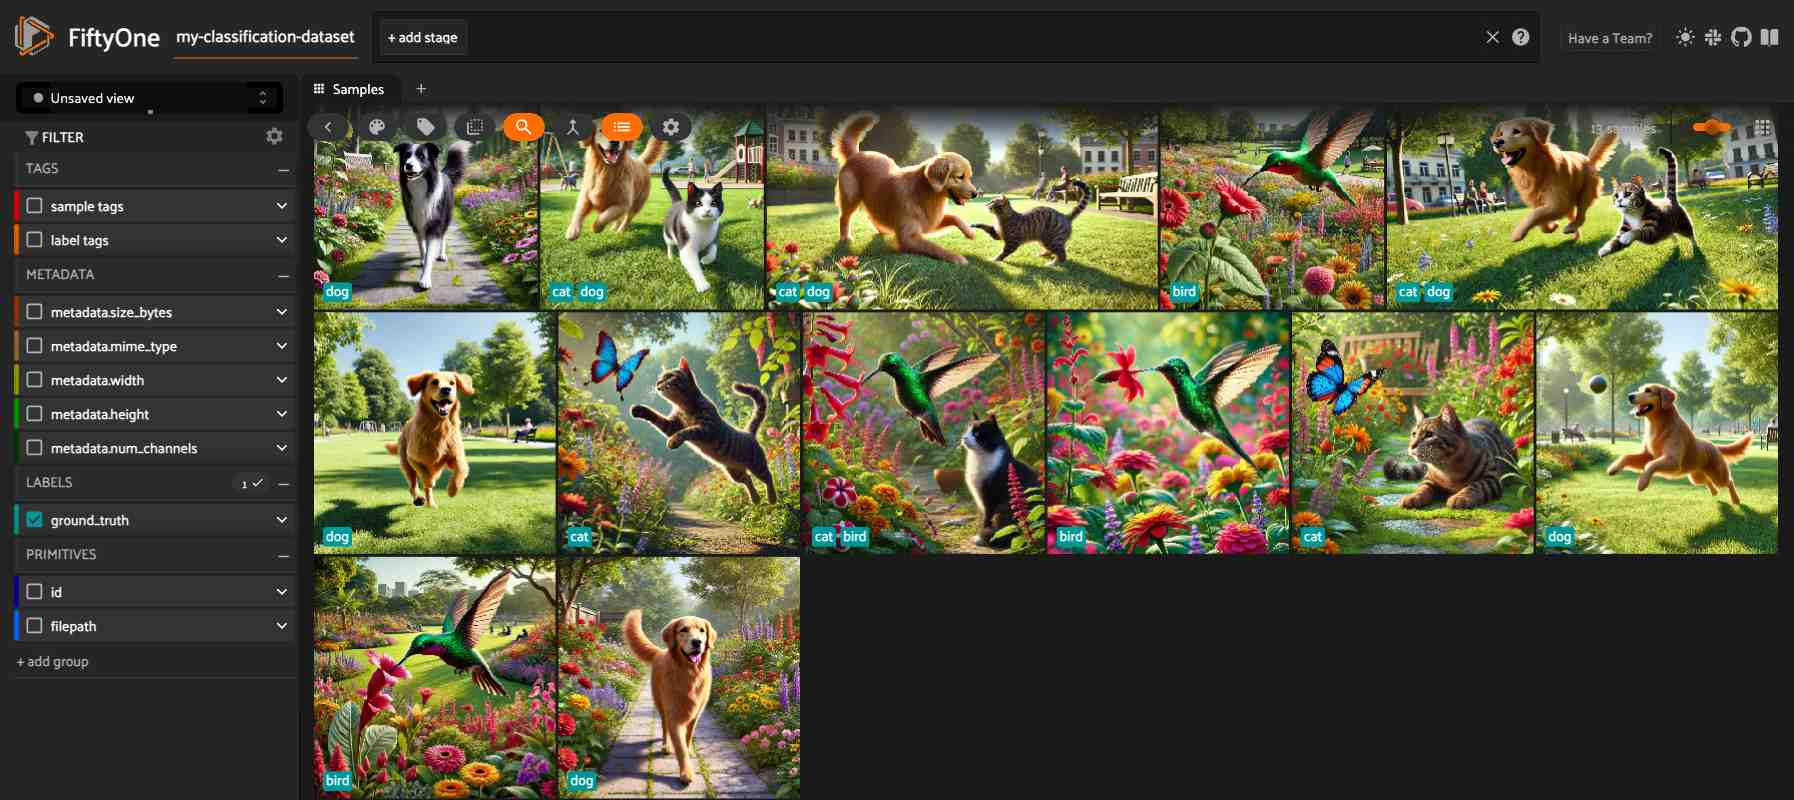

In [35]:
# visualize the dataset
# note: we already have a session

session.dataset = ds

### Bounding-box annotations

In [50]:
# create a new dataset

images_dir = "data/images"
annots_dir = "data/annotations/"

ds = fo.Dataset.from_images_dir(
    images_dir,
    name="my-detection-dataset"
)

ds.stats()

 100% |███████████████████| 13/13 [10.3ms elapsed, 0s remaining, 1.3K samples/s]     


{'samples_count': 13,
 'samples_bytes': 2587,
 'samples_size': '2.5KB',
 'total_bytes': 2587,
 'total_size': '2.5KB'}

In [51]:
ds.first()

<Sample: {
    'id': '667a3795aa1b7c07d57144aa',
    'media_type': 'image',
    'filepath': '/Users/mlstudio/git/mlstudio/Notebooks/fiftyone-dataset-management/data/images/pic01.jpg',
    'tags': [],
    'metadata': None,
}>

In [38]:
annot = json.load(open("data/annotations/pic10.json", "rt"))

annot

{'filename': 'pic10.jpg',
 'width': 1792,
 'height': 1024,
 'results': [{'label': 'cat',
   'polygon': 'POLYGON ((0.6952607129459879 0.2754293115986078, 0.7066393669772817 0.2773460367429167, 0.7284108896044235 0.3009179505393828, 0.7389952390747158 0.350311581400747, 0.7378192002446833 0.4230299823910888, 0.7386032261313716 0.4833999756660896, 0.7425233555648133 0.5197591761612604, 0.7672201709954954 0.5760130335311475, 0.779820786766577 0.6329239236696678, 0.7918851787896009 0.7078822191238098, 0.7915766322884514 0.7154416084019708, 0.7798518652447732 0.7170614775330051, 0.7736809352217848 0.7154416084019708, 0.7715211097137388 0.6981630043376028, 0.766584365695348 0.6781846183881776, 0.7530083196447732 0.6738649673720856, 0.7406664595987962 0.6609060143238097, 0.7320271575666123 0.6549664941766833, 0.7412835526010951 0.6787245747651891, 0.7422091921045434 0.6943833096985224, 0.7351126225781066 0.7041025244847293, 0.7280160530516698 0.7008627862226603, 0.7252391345413249 0.6943833096

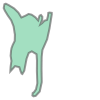

In [41]:
from shapely import wkt

wkt.loads(annot["results"][0]["polygon"])

In [60]:
from shapely import wkt

for sample in ds:
    filename = os.path.basename(sample["filepath"])
    annot_path = os.path.join(annots_dir, filename.replace(".jpg", ".json"))

    annot = json.load(open(annot_path, "rt"))

    detections = []
    for res in annot["results"]:
        polygon = wkt.loads(res["polygon"])
        x1, y1, x2, y2 = polygon.bounds
        det = fo.Detection(
            label=res["label"],
            bounding_box=(x1, y1, x2-x1, y2-y1)  # fmt: xywh
        )
        detections.append(det)

    sample["ground_truth"] = fo.Detections(detections=detections)

    # save the sample to dataset
    sample.save()



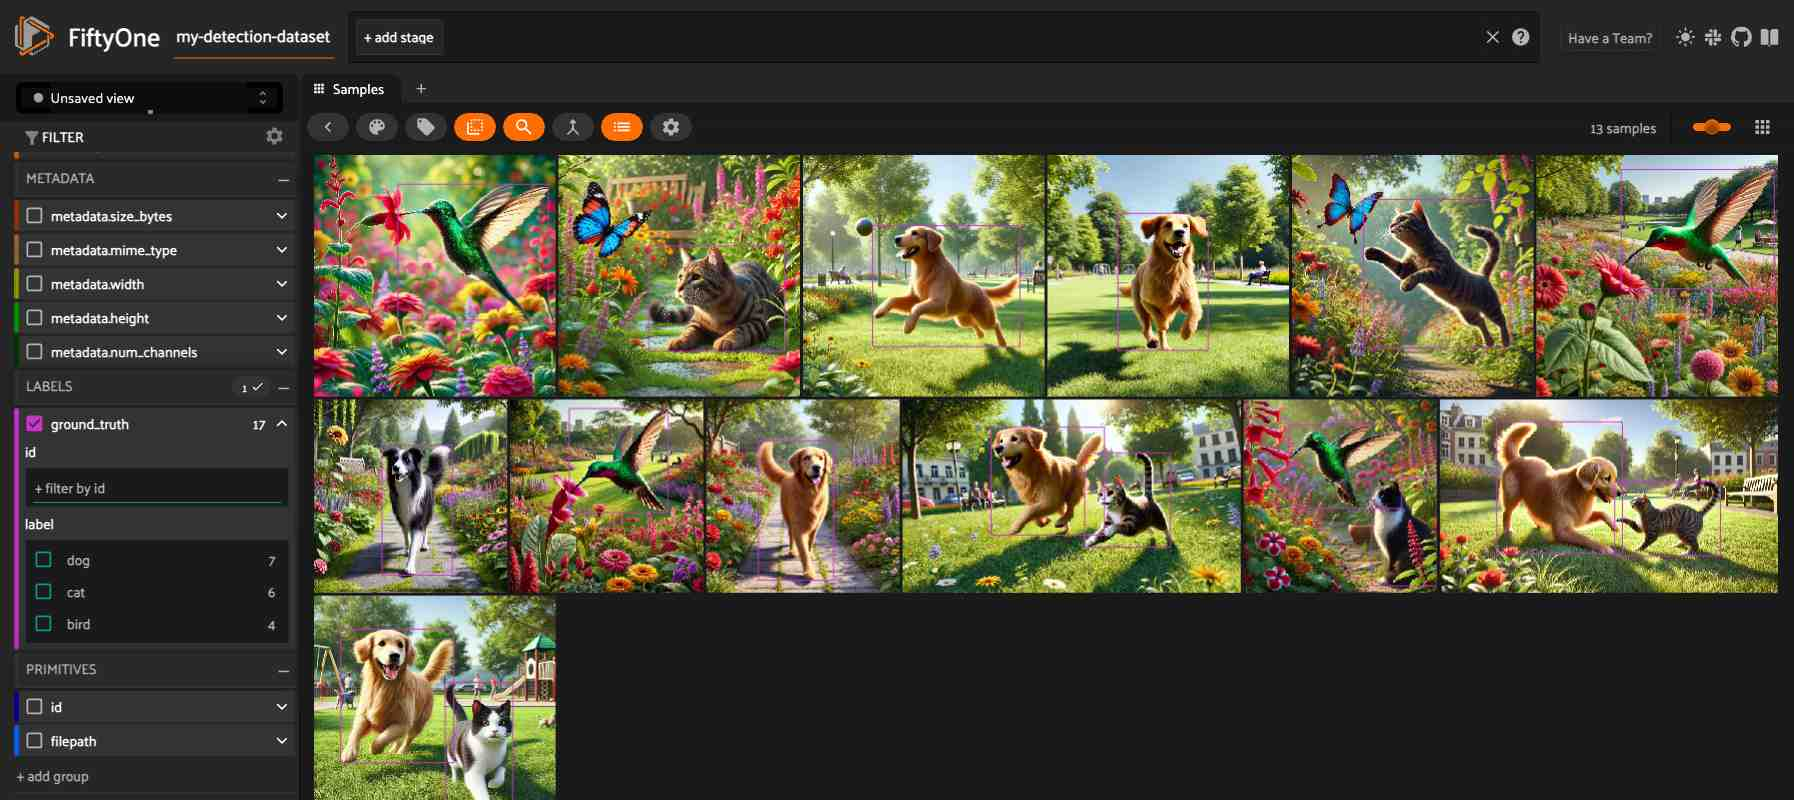

In [63]:
# visualize

session.dataset = ds


#### Polyline labels

In [64]:
images_dir = "data/images"
annots_dir = "data/annotations/"

ds = fo.Dataset.from_images_dir(
    images_dir,
    name="my-segmentation-dataset"
)

 100% |███████████████████| 13/13 [15.0ms elapsed, 0s remaining, 864.1 samples/s]     


In [65]:
for sample in ds:
    filename = os.path.basename(sample["filepath"])
    annot_path = os.path.join(annots_dir, filename.replace(".jpg", ".json"))

    annot = json.load(open(annot_path, "rt"))

    polylines = []
    for res in annot["results"]:
        polygon = wkt.loads(res["polygon"])
        poly = fo.Polyline(
            label=res["label"],
            points=[list(polygon.exterior.coords)], # List[List[(x, y)]]
            closed=True
        )
        polylines.append(poly)

    sample["ground_truth"] = fo.Polylines(polylines=polylines)

    # save the sample
    sample.save()

In [66]:
ds.first()

<Sample: {
    'id': '667a39faaa1b7c07d5714508',
    'media_type': 'image',
    'filepath': '/Users/mlstudio/git/mlstudio/Notebooks/fiftyone-dataset-management/data/images/pic01.jpg',
    'tags': [],
    'metadata': None,
    'ground_truth': <Polylines: {
        'polylines': [
            <Polyline: {
                'id': '667a3af8aa1b7c07d5714515',
                'attributes': {},
                'tags': [],
                'label': 'bird',
                'points': [
                    [
                        [0.6021246709747531, 0.2616609757421573],
                        [0.6336413209666665, 0.2293362065196821],
                        [0.6894015478754362, 0.1808490526859693],
                        [0.7734459478538718, 0.1210482296243901],
                        [0.832438651684889, 0.1210482296243901],
                        [0.8081950747680325, 0.1832734103776549],
                        [0.8938557132075919, 0.1444836873106846],
                        [0.9496159401163


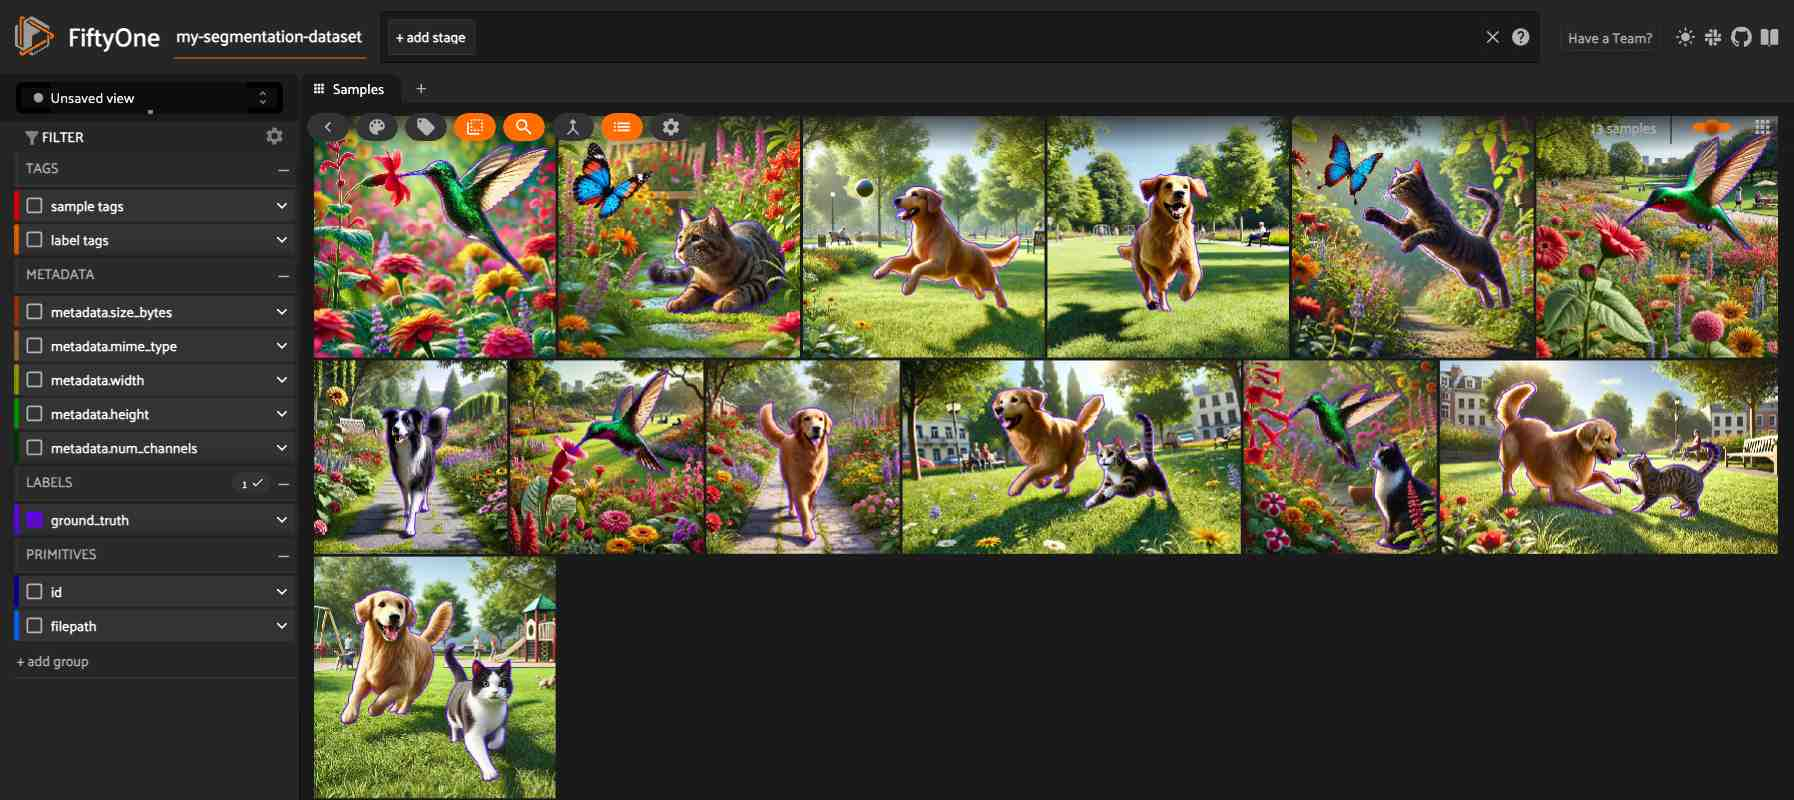

In [67]:
session.dataset = ds

### Filtering and selecting subsets of the dataset

##### A. Samples with just one object

In [68]:
from fiftyone import ViewField as F

ds.match(F("ground_truth.polylines").length() == 1)  # -> view

Dataset:     my-segmentation-dataset
Media type:  image
Num samples: 9
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Polylines)
View stages:
    1. Match(filter={'$expr': {'$eq': [...]}})

##### B. Samples with more than 1 objects


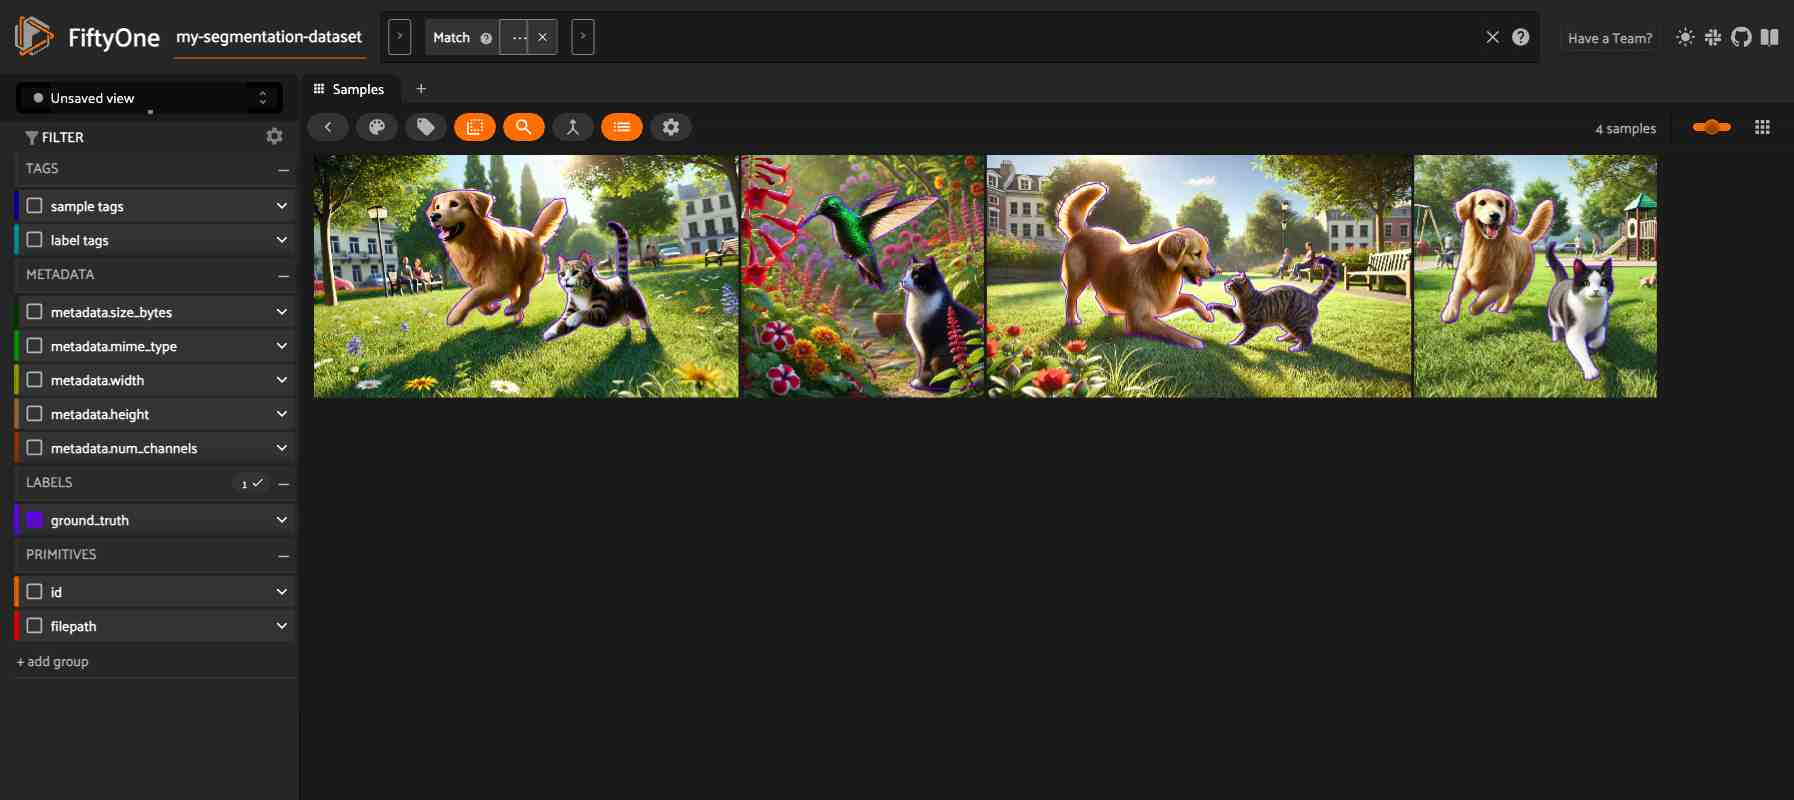

In [70]:
view = ds.match(F("ground_truth.polylines").length() > 1)

session.view = view

##### Cats and dogs 

In [71]:
view = ds.filter_labels(
    "ground_truth", F("label").is_in(["cat", "dog"])
)

view

Dataset:     my-segmentation-dataset
Media type:  image
Num samples: 10
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Polylines)
View stages:
    1. FilterLabels(field='ground_truth', filter={'$in': ['$$this.label', [...]]}, only_matches=True, trajectories=False)

In [72]:
session.view = view